In [1]:
import dicom2nifti
import os
from glob import glob
import matplotlib.pyplot as plt
import ants

### Upload Images

In [2]:
#we charge the brain atlas on T1 modality
atlas_path_t1 = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/sri24_spm8/templates/T1.nii'
atlas_t1 = ants.image_read(atlas_path_t1, reorient='IAL')

path_t = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/*'
out = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/NIFTI_TEST/Patient_6'
print(glob(path_t)) #this function creates an array whit the paths of the four modalities

for i, modality in enumerate(glob(path_t)): #we save the nifti files 
    
    if i == 0 : 
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(out, 't1c_test.nii'))
    elif i == 1 : 
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(out, 't2_test.nii'))
    elif i == 2 :
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(out, 'flair_test.nii'))
    else :
        dicom2nifti.dicom_series_to_nifti(modality, os.path.join(out, 't1_test.nii'))
path_t1_test = os.path.join(out, 't1_test.nii') #upload the files path
path_t1c_test = os.path.join(out, 't1c_test.nii')
path_t2_test = os.path.join(out, 't2_test.nii')
path_flair_test = os.path.join(out, 'flair_test.nii')

t1_t = ants.image_read(path_t1_test, reorient='IAL')
t1c_t = ants.image_read(path_t1c_test, reorient='IAL')
t2_t = ants.image_read(path_t2_test, reorient='IAL')
flair_t = ants.image_read(path_flair_test, reorient='IAL')

print('t1: ', t1_t)
print('t1c: ', t1c_t)
print('t2:', t2_t)
print('flair: ', flair_t)


['/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/6-AX T1 POST-26504', '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/3-AX T2 FSE-27597', '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/4-AX FLAIR-23922', '/Users/Maxy/Desktop/GBM/Herramienta_CAD/TCGA-GBM/TCGA-02-0006/08-23-1996-MRI BRAIN W WO CONTRAMR-42545/5-AX T1-62419']
t1:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t1c:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t2: ANTsImage (IAL)
	 Pixel Type : float (float3

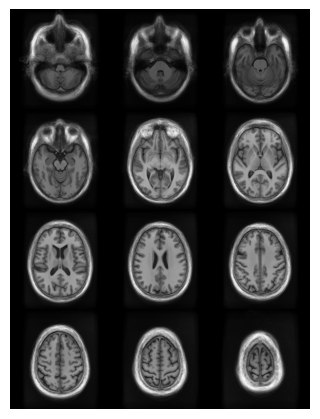

atlas info: ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



In [21]:
ants.plot(atlas_t1, figsize=1, axis=2)
print('atlas info:', atlas_t1)


### Co-Registration

In [13]:
template = t1_t

transformation_t1c = ants.registration(
    fixed=template,
    moving=t1c_t, 
    type_of_transform='Similarity',
    verbose=True
)
transformation_t2 = ants.registration(
    fixed=template,
    moving=t2_t, 
    type_of_transform='Similarity',
    verbose=True
)

transformation_flair = ants.registration(
    fixed=template,
    moving=flair_t, 
    type_of_transform='Similarity',
    verbose=True
)

antsRegistration -d 3 -r [0x7ff6e54516e0,0x7ff6e52ceb30,1] -m mattes[0x7ff6e54516e0,0x7ff6e52ceb30,1,32,regular,0.2] -t Similarity[0.25] -c 2100x1200x1200x10 -s 3x2x1x0 -f 6x4x2x1 -u 1 -z 1 -o [/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmpg0_qmq82,0x7ff6e5423580,0x7ff6e563cce0] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x7ff6e54516e0 and moving image: 0x7ff6e52ceb30 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
  number of levels = 4
  fixed image: 0x7ff6e54516e0
  moving image: 0x7ff6e52ceb30
Dimension = 3
Number of stages = 1
Use histogram matching = true
Winsorize image intensities = false
  Lower quantile = 0.0000e+00
  Upper quantile = 1.0000e+00


Stage 1 State
   Image metric = Mattes
     Fixed image = Image (0x7f

In [14]:
print('t1c:', transformation_t1c)
print('t2:', transformation_t2)
print('flair:', transformation_flair)

t1c: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmpg0_qmq820GenericAffine.mat'], 'invtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmpg0_qmq820GenericAffine.mat']}
t2: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	

In [15]:
t1c_reg= transformation_t1c['warpedmovout']
t2_reg = transformation_t2['warpedmovout']
flair_reg = transformation_flair['warpedmovout']

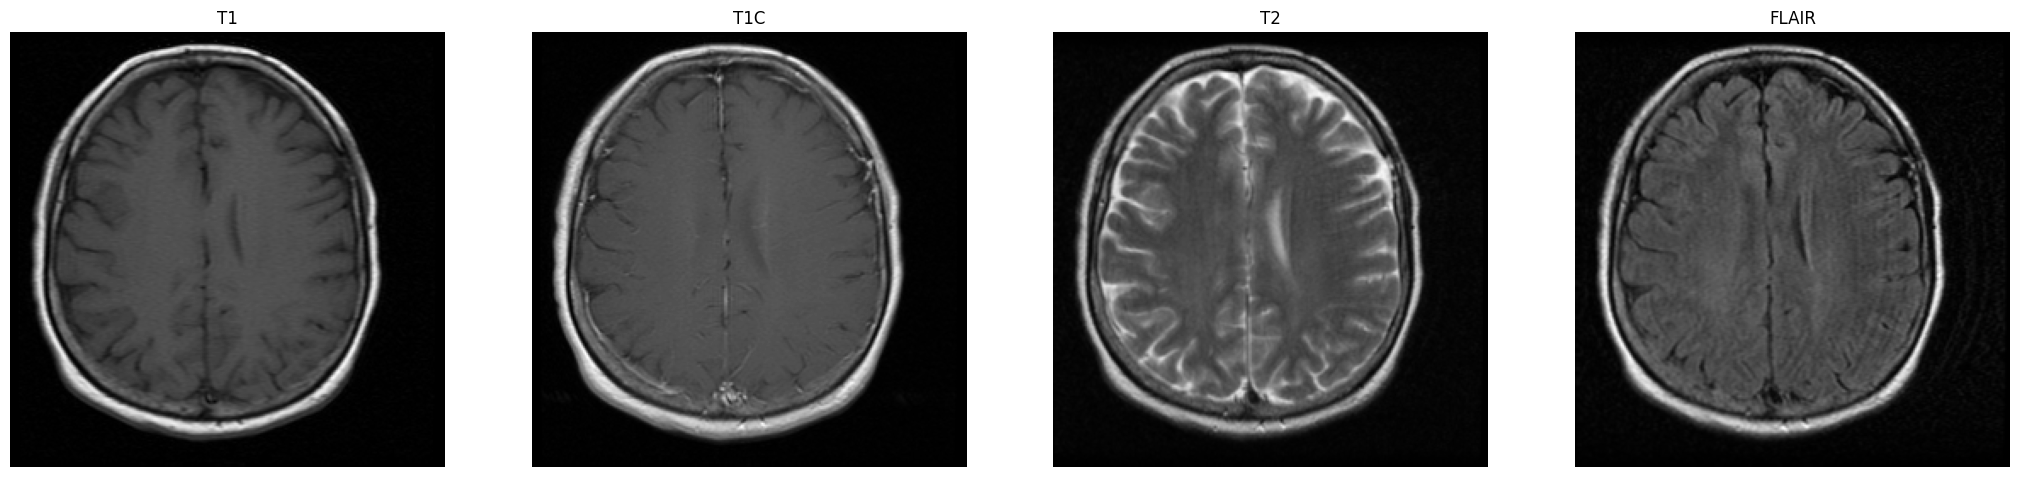

In [16]:
f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (img, title) in enumerate(zip([t1_t, t1c_reg, t2_reg, flair_reg], ['T1', 'T1C', 'T2', 'FLAIR'])):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(img[:][:][15], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

### Brats space transform

In [17]:
#Now we pass T1 trough a brain atlas from SRI24 format 
transformation_brats_space = ants.registration(
    fixed=atlas_t1,
    moving=t1_t, 
    type_of_transform='Similarity',
    verbose=True
)

antsRegistration -d 3 -r [0x7ff6e5460220,0x7ff6e36d50b0,1] -m mattes[0x7ff6e5460220,0x7ff6e36d50b0,1,32,regular,0.2] -t Similarity[0.25] -c 2100x1200x1200x10 -s 3x2x1x0 -f 6x4x2x1 -u 1 -z 1 -o [/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t,0x7ff6e36d2fc0,0x7ff6e36d5e50] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x7ff6e5460220 and moving image: 0x7ff6e36d50b0 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
  number of levels = 4
  fixed image: 0x7ff6e5460220
  moving image: 0x7ff6e36d50b0
Dimension = 3
Number of stages = 1
Use histogram matching = true
Winsorize image intensities = false
  Lower quantile = 0.0000e+00
  Upper quantile = 1.0000e+00


Stage 1 State
   Image metric = Mattes
     Fixed image = Image (0x7f

In [18]:
print('new transformation:', transformation_brats_space)

new transformation: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t0GenericAffine.mat'], 'invtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t0GenericAffine.mat']}


In [19]:
t1_res = transformation_brats_space['warpedmovout']


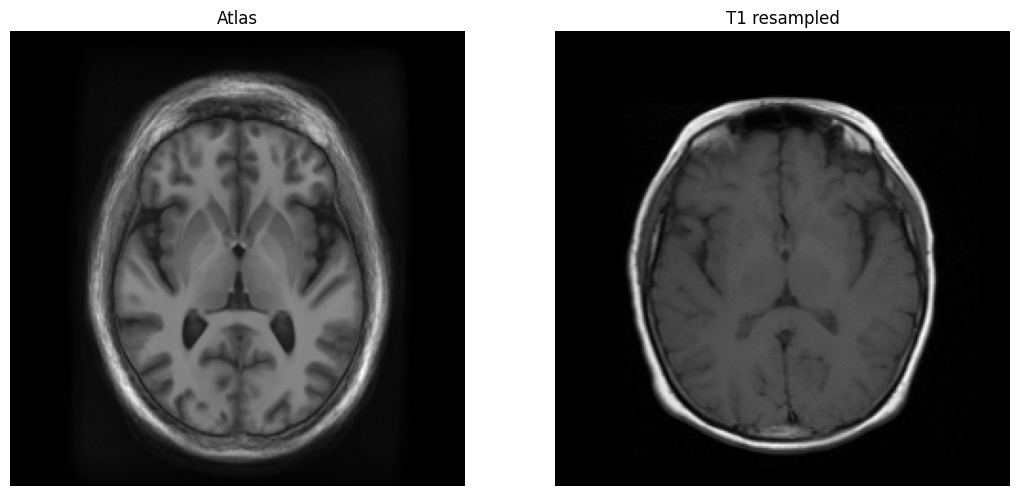

In [20]:
f1, axs1 = plt.subplots(1, 2, figsize=(10, 5))
images = [atlas_t1, t1_res]
titles = ['Atlas', 'T1 resampled']

for i, (img, title) in enumerate(zip(images, titles)):
    axs1[i].imshow(img[70, :, :], cmap='gray')  
    axs1[i].set_title(title)
    axs1[i].axis('off')

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for ax in axs1:
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [21]:
print("Ruta de archivo de transformación:", transformation_brats_space)

Ruta de archivo de transformación: {'warpedmovout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'warpedfixout': ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (23, 256, 256)
	 Spacing    : (6.5, 0.7812, 0.7812)
	 Origin     : (89.2188, -95.8, -62.7)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]
, 'fwdtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t0GenericAffine.mat'], 'invtransforms': ['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t0GenericAffine.mat']}


In [25]:
print(transformation_brats_space['fwdtransforms'][0])
transform_paths = [transformation_brats_space['fwdtransforms'][0]]
print(transform_paths)

# List of imagees to transform
images_to_transform = [t2_reg, t1c_reg, flair_reg]
# empty array
transformed_images = []

# Aplicar la transformación a cada imagen con interpolador nearestNeighbor

for moving_image in images_to_transform:
    transformed_image = ants.apply_transforms(
        fixed=atlas_t1,  # must be atlas
        moving=moving_image,
        transformlist=transform_paths,
        interpolator='linear',  # Using nearestNeighbour to preserve intensities
        imagetype=0,  
        verbose=True
    )
    transformed_images.append(transformed_image)

# transform_images now contains the transformed versions of t2, t1c, flair
# we can access them using transformed_images[0], transformed_images[1], transformed_images[2]

/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t0GenericAffine.mat
['/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t0GenericAffine.mat']
['-d', '3', '-i', '0x7ff6e563e7d0', '-o', '0x7ff6e54608f0', '-r', '0x7ff6e563e7e0', '-n', 'linear', '-t', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t0GenericAffine.mat']
Using single precision for computations.
Input scalar image: 0x7ff6e563e7d0
Reference image: 0x7ff6e563e7e0
The composite transform comprises the following transforms (in order): 
  1. /var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t0GenericAffine.mat (type = AffineTransform)
Default pixel value: 0.0000e+00
Interpolation type: LinearInterpolateImageFunction
Output warped image: 0x7ff6e54608f0
['-d', '3', '-i', '0x7ff6e3b66690', '-o', '0x7ff6e3b7e0b0', '-r', '0x7ff6e5590f50', '-n', 'linear', '-t', '/var/folders/gn/lbvm9zfj74d93lfzhfh2tqj80000gp/T/tmp9eevo05t0GenericAffine.mat']
Using single precision for computations.
Input scalar 

t1:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t1c:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

t2: ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

flair:  ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



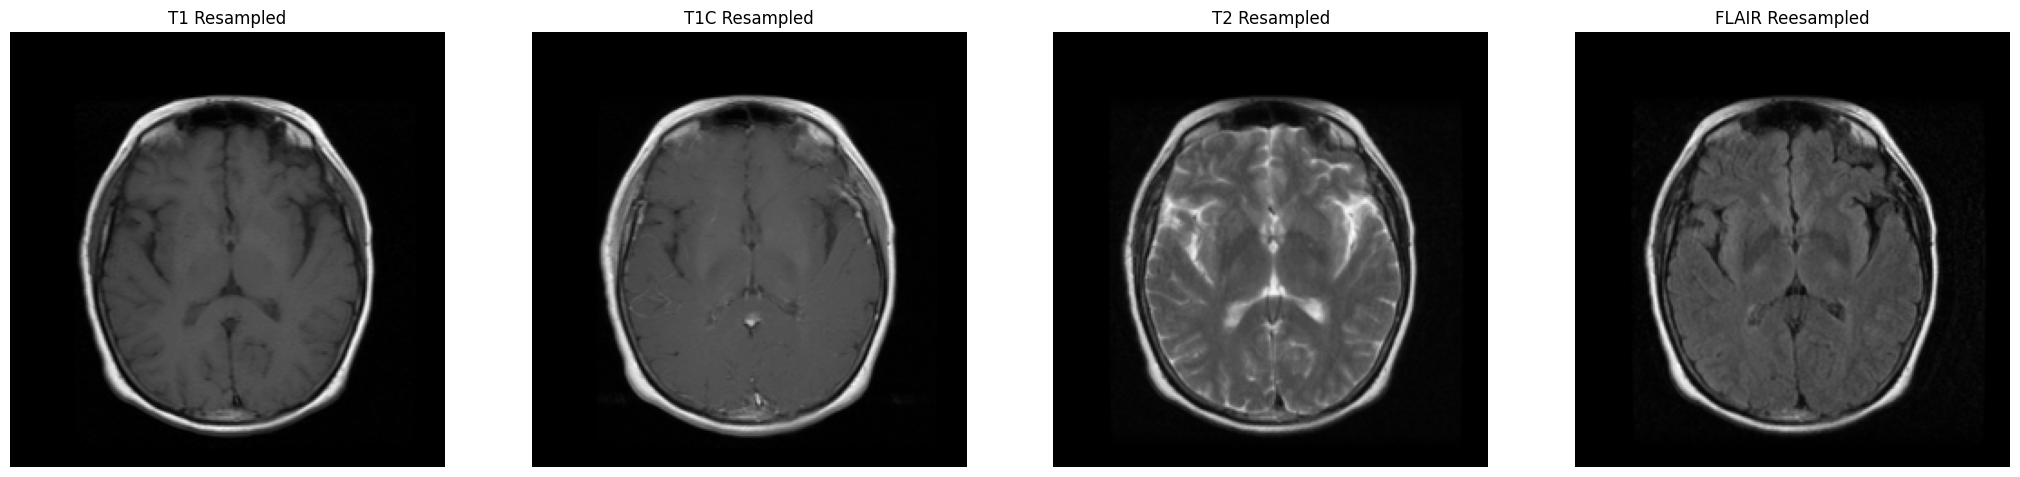

In [26]:
t2_res = transformed_images[0]
t1c_res = transformed_images[1]
flair_res = transformed_images[2]

print('t1: ', t1_res)
print('t1c: ', t1c_res)
print('t2:', t2_res)
print('flair: ', flair_res)

f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (img, title) in enumerate(zip([t1_res, t1c_res, t2_res, flair_res], ['T1 Resampled', 'T1C Resampled', 'T2 Resampled', 'FLAIR Reesampled'])):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(img[:][:][70], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

### Brain Extraction 

In [27]:
from antspynet.utilities import brain_extraction
prob_brain_mask = brain_extraction(t1_res, modality="t1", verbose=True,)


2024-02-20 15:50:22.494639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Brain extraction:  retrieving model weights.
Brain extraction:  retrieving template.
Brain extraction:  normalizing image to the template.
Brain extraction:  prediction and decoding.
1/1 [==============================] - 6s 6s/step
Brain extraction:  renormalize probability mask to native space.


ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (120.0, -110.0, -68.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



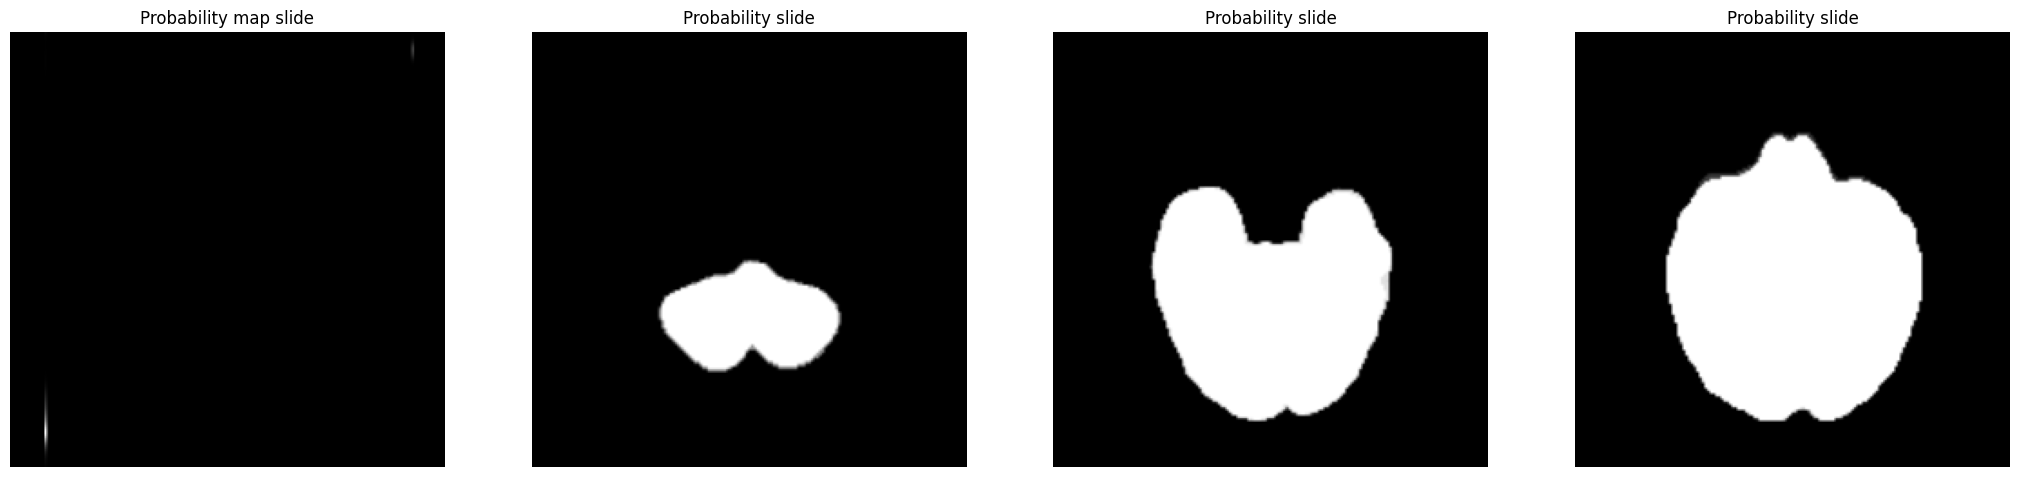

In [28]:
print(prob_brain_mask)

f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (title) in enumerate( ['Probability map slide', 'Probability slide', 'Probability slide', 'Probability slide']):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(prob_brain_mask[i*20][:][:], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

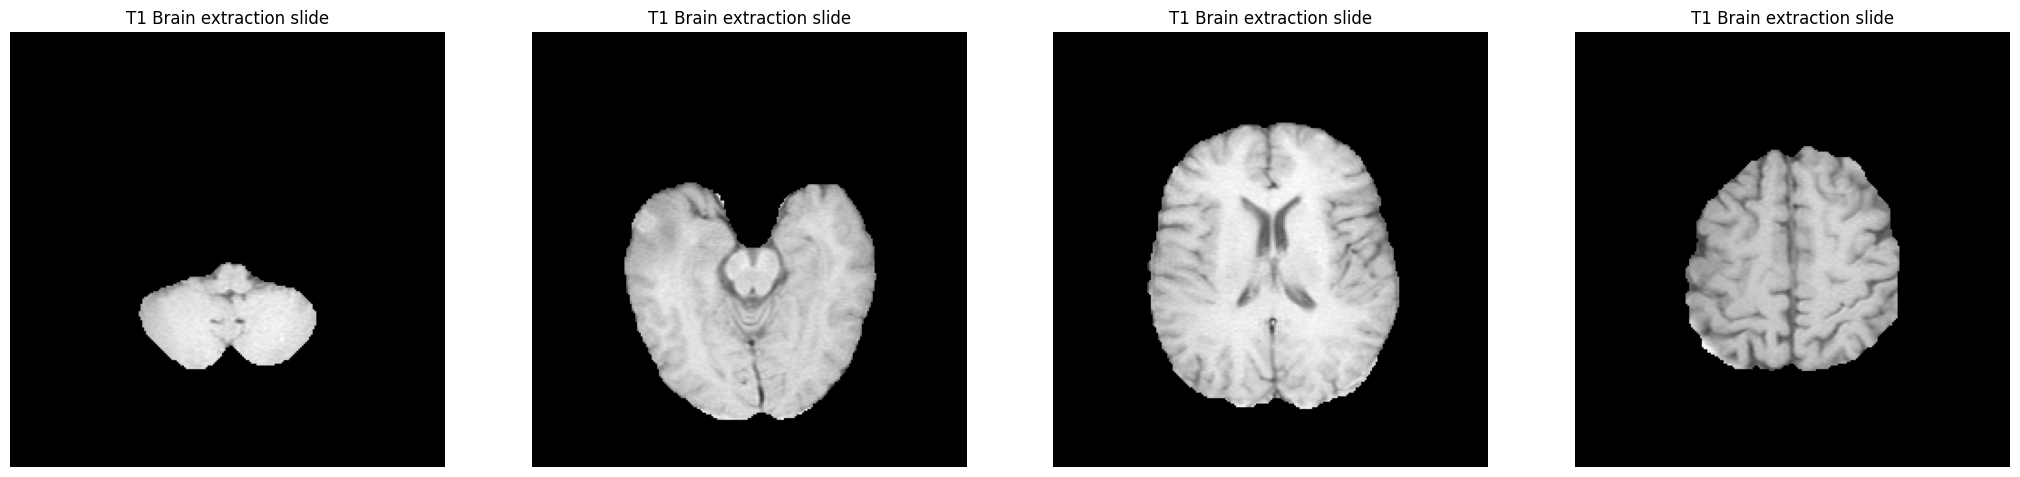

In [44]:
brain_mask_t1 = ants.get_mask(prob_brain_mask, low_thresh=0.8)

masked_t1 = ants.mask_image(t1_res, brain_mask_t1)

f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (title) in enumerate( ['T1 Brain extraction slide', 'T1 Brain extraction slide', 'T1 Brain extraction slide', 'T1 Brain extraction slide']):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(masked_t1[i*30+20][:][:], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [45]:
masked_t1c = ants.mask_image(t1c_res, brain_mask_t1)
masked_t2 = ants.mask_image(t2_res, brain_mask_t1)
masked_flair = ants.mask_image(flair_res, brain_mask_t1)

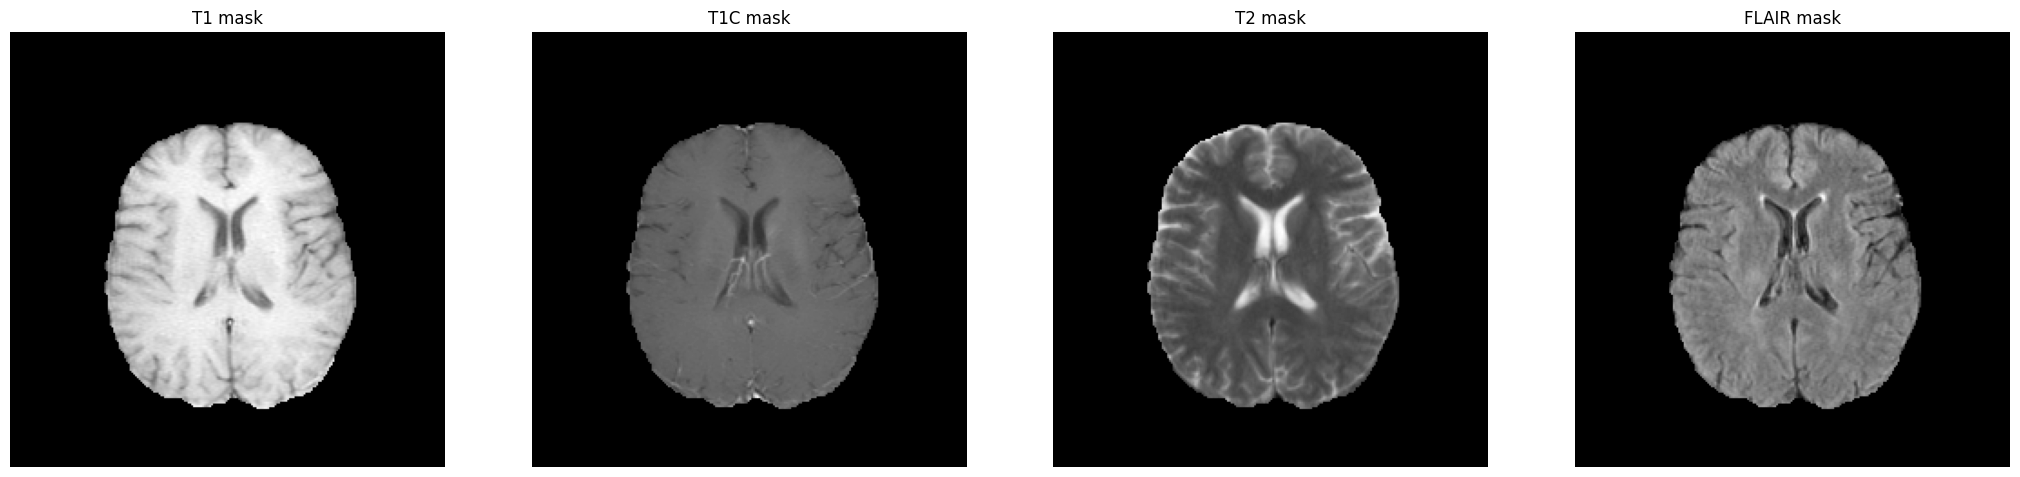

In [46]:
f1, axs1 = plt.subplots(1, 4, figsize=(10, 10))

for i, (img, title) in enumerate(zip([masked_t1, masked_t1c, masked_t2, masked_flair], ['T1 mask', 'T1C mask', 'T2 mask', 'FLAIR mask'])):
    plt.subplot(1, 4, i + 1)
    plt.title(title)
    plt.imshow(img[:][:][80], cmap='gray')
    plt.axis('off')

# Eliminar fondo blanco
plt.subplots_adjust(left=0, right=2, top=2, bottom=0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [47]:
import nibabel as nib
from tempfile import mkstemp
masked_t1.set_origin((239,-239,0))
# Ruta de destino para guardar el archivo NIfTI
ruta_destino = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/sri24_spm8/Github'

# Guardar el archivo NIfTI en la ruta especificada
fd, tmpfile = mkstemp(suffix=".nii.gz")
masked_t1.to_filename(tmpfile)
new_img = nib.load(tmpfile)
os.close(fd)

In [48]:
nib.save(new_img,ruta_destino)

In [49]:
import pandas as pd

path_control = '/Users/Maxy/Desktop/GBM/Herramienta_CAD/Pre-operative_TCGA_GBM_NIfTI_and_Segmentations/TCGA-02-0006/TCGA-02-0006_1996.08.23_t1.nii.gz'
control = ants.image_read(path_control, reorient='IAL')
masked_t1.set_origin((239,-239,0))
print(masked_t1)
print(control)



ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (239.0, -239.0, 0.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]

ANTsImage (IAL)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (155, 240, 240)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (239.0, -239.0, 0.0)
	 Direction  : [ 0.  0. -1.  0.  1.  0.  1.  0.  0.]



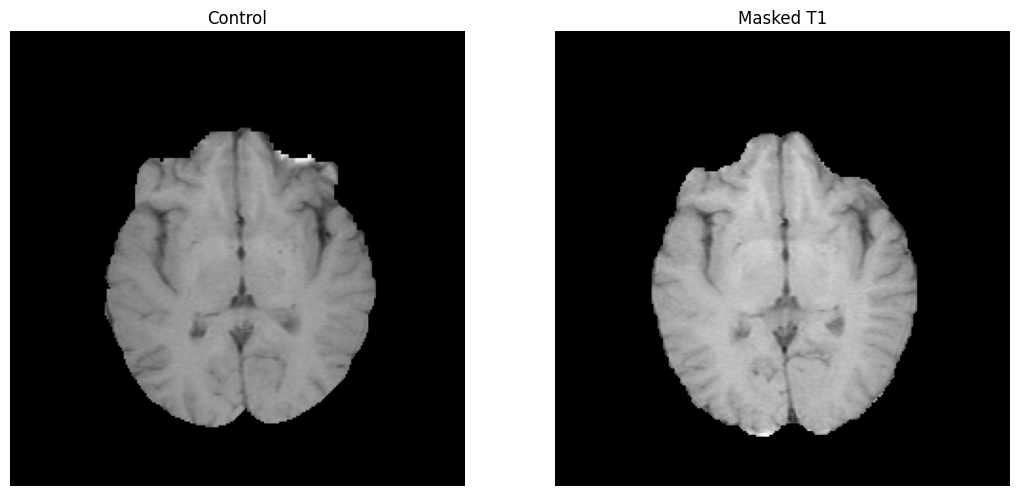

In [50]:
f1, axs1 = plt.subplots(1, 2, figsize=(10, 5))
images = [control, masked_t1]
titles = ['Control', 'Masked T1']

for i, (img, title) in enumerate(zip(images, titles)):
    axs1[i].imshow(img[65, :, :], cmap='gray')  
    axs1[i].set_title(title)
    axs1[i].axis('off')

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for ax in axs1:
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

plt.show()

In [56]:
import numpy as np

def dice_coefficient(volume1, volume2):
    intersection = np.sum(volume1 * volume2)
    total_voxels = np.sum(volume1) + np.sum(volume2)

    dice = (2.0 * intersection) / total_voxels

    return dice

def dice_coef(y_true, y_pred, epsilon=0.00001):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    
    """
    axis = (0,1,2)
    dice_numerator = 2. * np.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator =np.sum(y_true*y_true, axis=axis) + np.sum(y_pred*y_pred, axis=axis) + epsilon
    return np.mean((dice_numerator)/(dice_denominator))


m1 = masked_t1.numpy()
cont= control.numpy()
valor_minimo = np.min(cont)
valor_maximo = np.max(cont)

print(f"Valor mínimo: {valor_minimo}")
print(f"Valor máximo: {valor_maximo}")

threshold = 260

# Binariza los arrays
bm1 = (m1 > threshold).astype(int)
bcont = (cont > threshold).astype(int)
resultado_dice = dice_coefficient(bm1, bcont)
result = dice_coef(bcont,bm1)
print(f"Índice de Dice: {resultado_dice}")
print(result)

Valor mínimo: 0.0
Valor máximo: 502.0
Índice de Dice: 0.8663064626737185
0.8663064626745667
